1000


<IPython.core.display.Javascript object>


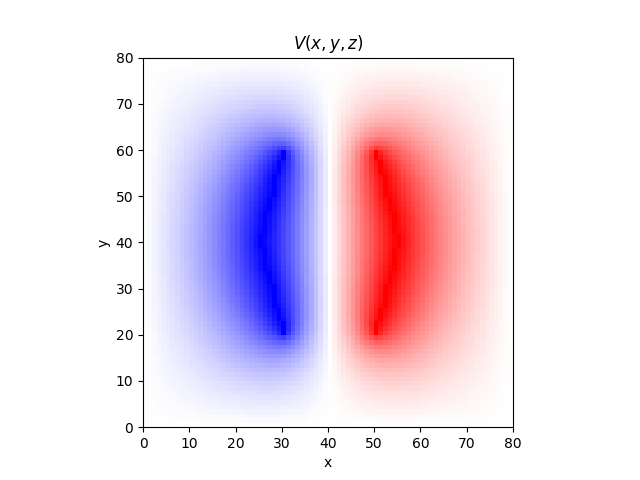

<IPython.core.display.Javascript object>


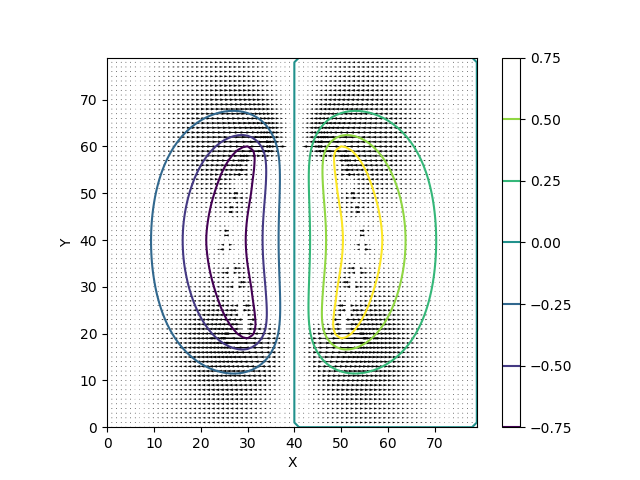

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Nx = 80
Ny = 80
Nz = 80
px = 20
py = 20
d = 10
c = 5.0   

V = np.zeros((Nx,Ny,Nz))
Vp = np.zeros((Nx,Ny,Nz))

def fixPlatesV(V, Nx, Ny,Nz, px,py, d):
    for j in range(Ny//2 - px, Ny//2 + py):
       for i in range(Nx//2 - px, Nx//2 + px):
          if(i < Nx//2):
             k = -int(round((c/px)*(i-(Nx//2 - px)))) + (Nz//2 - d)
          else:
             k = -int(round((c/px)*((Nx//2 + px) - i))) + (Nz//2 - d)
          V[i,j,k] = -1.0

    for j in range(Ny//2 - px, Ny//2 + py):
       for i in range(Nx//2 - px, Nx//2 + px):
          if(i <= Nx//2):
             k = int(round((c/px)*(i-(Nx//2 - px)))) + (Nz//2 + d)
          else:
             k = int(round((c/px)*((Nx//2 + px) - i))) + (Nz//2 + d)
          V[i,j,k] = 1.0

    return V
    
dV = 1.0
t = 0
maxiter = 1000
 
while (dV > 1E-3) or (t < maxiter):
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            for k in range(1,Nz-1):
                V[i,j,k] = (1.0/6)*(Vp[i+1,j,k] + Vp[i-1,j,k] + Vp[i,j+1,k] + Vp[i,j-1,k]+Vp[i,j,k-1]+Vp[i,j,k+1])
    V=fixPlatesV(V, Nx, Ny,Nz, px,py, d)
    dV = np.sum(np.abs(V - Vp))/(Nx*Ny*Nz)
    Vp = V.copy()
    t+=1

print(t)

plt.figure()
ax = plt.axes(aspect='equal')
plt.pcolormesh(V[:,40,:], cmap = 'bwr') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'$V(x,y,z)$')
plt.show()

    
#Electric field part
x = np.arange(0,Nx)
y = np.arange(0,Ny)
z = np.arange(0,Nz)
def grad(f):
    gx = np.zeros_like(f)
    gy = np.zeros_like(f)
    gz = np.zeros_like(f)
    for n in range(1,Nx-1):
        for m in range(1,Ny-1):
            for k in range(1,Nz-1):
                gx[n,m,k] = (V[n+1,m,k]-V[n-1,m,k])/(x[n+1]-x[n-1]);
                gy[n,m,k] = (V[n,m+1,k]-V[n,m-1,k])/(y[m+1]-y[m-1]);
                gz[n,m,k] = (V[n,m,k+1]-V[n,m,k-1])/(z[k+1]-z[k-1]);
    return gx, gy, gz

gx,gy,gz = grad(V)
X, Y = np.meshgrid(x,y)

plt.figure('with X and Y')
plt.contour(X, Y, V[:,40,:])
plt.colorbar()
plt.quiver(X, Y, 10*gx[:,40,:], 10*gy[:,40,:])
plt.xlabel("X")
plt.ylabel("Y")
plt.axes().set_aspect('equal')

plt.show()

In [10]:
from scipy.io import netcdf 

fp = netcdf.NetCDFFile('potential.nc','w')

fp.createDimension('x', Nx) 
x = fp.createVariable('x', 'd', ('x',)) 
x[:] = np.linspace(0.0, Nx, Nx,endpoint=False) 
x.units = 'm'                               

fp.createDimension('y', Ny)
y = fp.createVariable('y', 'd', ('y',))
y[:] = np.linspace(0.0, Ny, Ny,endpoint=False)
y.units = 'm'

fp.createDimension('z', Nz)
z = fp.createVariable('z', 'd', ('z',))
z[:] = np.linspace(0.0, Nz, Nz,endpoint=False)
z.units = 'm'

V_data       = fp.createVariable('Potential', 'd', ('z','y','x'))
V_data.units = 'V'
V_data[:]    = V.T

fp.close()

In [23]:
from scipy.io import netcdf 

fp = netcdf.NetCDFFile('Electricfield.nc','w') 


fp.createDimension('x', Nx)
x = fp.createVariable('x', 'd', ('x',))
x[:] = np.linspace(0.0, Nx, Nx,endpoint=False) 
x.units = 'm'                               

fp.createDimension('y', Ny)
y = fp.createVariable('y', 'd', ('y',))
y[:] = np.linspace(0.0, Ny, Ny,endpoint=False)
y.units = 'm'

fp.createDimension('z', Nz)
z = fp.createVariable('z', 'd', ('z',))
z[:] = np.linspace(0.0, Nz, Nz,endpoint=False)
z.units = 'm'

# Store the data array
E_data       = fp.createVariable('Electricfield', 'd', ('z','y','x'))
E_data.units = grad(V)



In [18]:
## Initialise force, position and velocity of the particles
import numpy as np
import matplotlib.pyplot as plt
t=10
eps=1
sig=1
Nmax = 25
x=np.zeros(Nmax)
y=np.zeros(Nmax)
z=np.zeros(Nmax)
vx=np.zeros(Nmax)
vy=np.zeros(Nmax)
vz=np.zeros(Nmax)
fx=np.zeros(Nmax)
fy=np.zeros(Nmax)
fz=np.zeros(Nmax)
l=10
lc=5.26E-10   # lattice constant


for i in range (0 , 2):
                x [i] = np.abs(np.random.random()-0.5)
                y [i] = np.abs(np.random.random()-0.4)
                z[i]  = np.abs(np.random.random()-0.3)
                vx[i]=np.random.random()
                vy[i]=np.random.random()
                vz[i]=np.random.random()
   
    

fx[0]= fy [0]  = fz[0]=0   # initial Forces are 0
for i in range (0,1):
    for j in range (1,2):           
            dx = x[j] - x[i]    # separation of atom x,y,z
            dy = y [j] - y[i]
            dz= z [j] - z[i]
            r = np.sqrt(dx**2 + dy**2 + dz**2)
VLJ = 4*((sig/r)**12 - (sig/r)**6)
fx[1] =  fx[0] + 48*((-sig/r)**13 +0.5* (sig/r)**7) * (dx/r)
fy [1]= fx[0] + 48*((-sig/r)**13 +0.5* (sig/r)**7) * (dy/r)
fz [1]=fx[0] +  48*((-sig/r)**13 +0.5* (sig/r)**7) * (dz/r)
initf=fx + fy +fz 
print(initf)
    